<h1 style="color: blue; text-align:center;">LINEAR REGRESSION - Los Angeles</h1>
<p>Predicting temperatures according to pollution gases</p>

<h3>1. Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h3>2. Reading the data</h3>

In [2]:
data = pd.read_csv("data/los_angeles_data.csv")
data.head()

,Unnamed: 0,NO2,SO2,CO,O3,Temperature
0,2000,40.1056,1.2726,1.0665,0.0177,62.4
1,2001,37.9475,2.4532,1.1439,0.0189,61.1
2,2002,31.6259,2.3950,0.9490,0.0167,59.5
3,2003,33.6259,2.0295,0.9590,0.0187,61.7
4,2004,25.1765,2.6180,0.5942,0.0281,62.6


<h3>3. Analyzing the data</h3>

In [3]:
data.shape

(16, 6)

In [4]:
data.describe()

,Unnamed: 0,NO2,SO2,CO,O3,Temperature
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,24.284512,1.390219,0.600575,0.022550,62.306250
std,4.760952,7.293196,1.064331,0.266688,0.003264,1.403077
min,2000.000000,18.146700,0.265700,0.377000,0.016700,59.500000
25%,2003.750000,19.575750,0.369900,0.409975,0.021450,61.525000
50%,2007.500000,20.947250,1.151200,0.492000,0.022750,62.350000
75%,2011.250000,26.788850,2.120875,0.682900,0.023800,62.775000
max,2015.000000,40.105600,3.715700,1.143900,0.028100,65.300000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16 non-null     int64  
 1   NO2          16 non-null     float64
 2   SO2          16 non-null     float64
 3   CO           16 non-null     float64
 4   O3           16 non-null     float64
 5   Temperature  16 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes


In [6]:
data.isna().sum()

Unnamed: 0     0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
dtype: int64

<h3>4. Cleaning the data</h3>

In [8]:
data = data.set_index("Unnamed: 0")
data.index.name = None
data

,NO2,SO2,CO,O3,Temperature
2000,40.1056,1.2726,1.0665,0.0177,62.4
2001,37.9475,2.4532,1.1439,0.0189,61.1
2002,31.6259,2.3950,0.9490,0.0167,59.5
2003,33.6259,2.0295,0.9590,0.0187,61.7
2004,25.1765,2.6180,0.5942,0.0281,62.6
2005,20.0479,3.7157,0.4351,0.0234,62.3
2006,21.9860,1.9429,0.3837,0.0223,63.0
2007,21.4902,1.8018,0.3841,0.0238,61.6
2008,20.4043,0.9937,0.3770,0.0238,62.5
2009,21.8176,1.0298,0.5203,0.0229,61.7


In [9]:
data.corr()

,NO2,SO2,CO,O3,Temperature
NO2,1.000000,0.433771,0.955387,-0.747276,-0.440765
SO2,0.433771,1.000000,0.347214,-0.256947,-0.415365
CO,0.955387,0.347214,1.000000,-0.754538,-0.429522
O3,-0.747276,-0.256947,-0.754538,1.000000,0.696165
Temperature,-0.440765,-0.415365,-0.429522,0.696165,1.000000


<h3>5. Checking relation between data</h3>

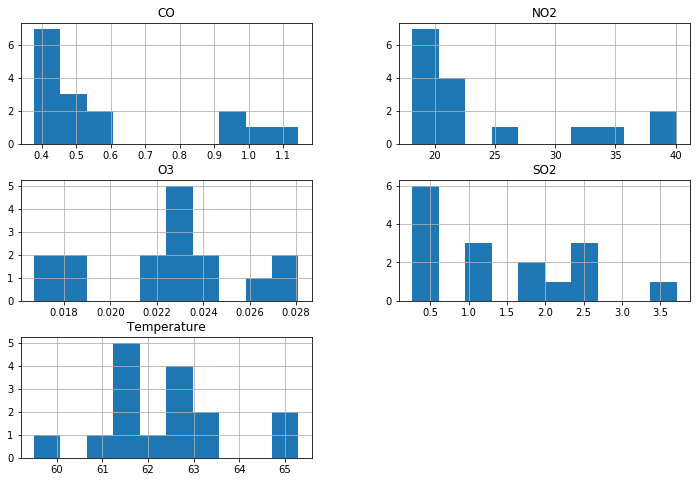

In [10]:
data[['NO2','SO2','CO','O3', 'Temperature']].hist(figsize=(12, 8))
plt.show()

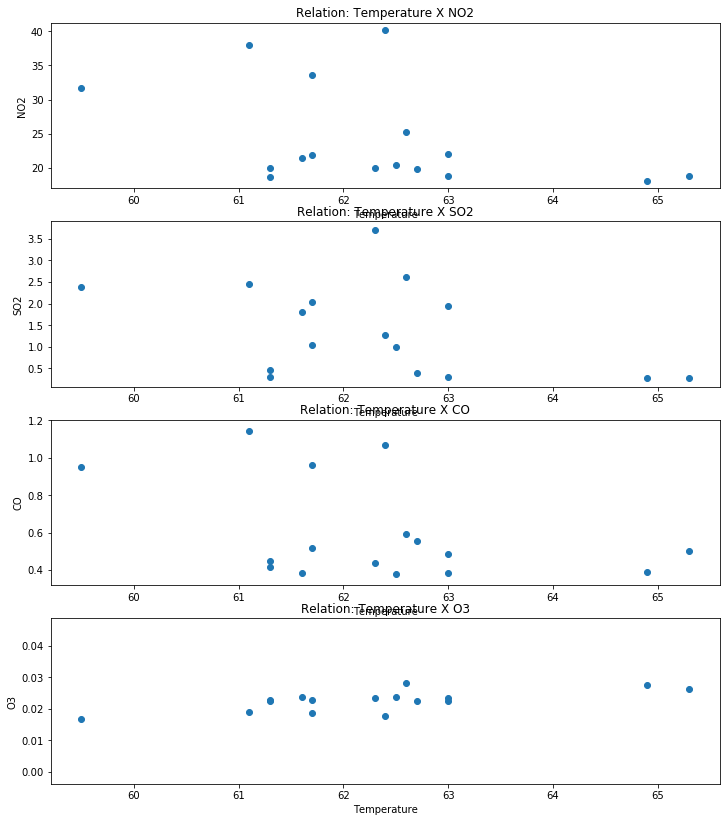

In [12]:
fig, axs = plt.subplots(4, figsize=(12,14))

axs[0].scatter(data['Temperature'], data['NO2'])
axs[0].set_title("Relation: Temperature X NO2")
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("NO2")

axs[1].scatter(data['Temperature'], data['SO2'])
axs[1].set_title("Relation: Temperature X SO2")
axs[1].set_xlabel("Temperature")
axs[1].set_ylabel("SO2")

axs[2].scatter(data['Temperature'], data['CO'])
axs[2].set_title("Relation: Temperature X CO")
axs[2].set_xlabel("Temperature")
axs[2].set_ylabel("CO")

axs[3].scatter(data['Temperature'], data['O3'])
axs[3].set_title("Relation: Temperature X O3")
axs[3].set_xlabel("Temperature")
axs[3].set_ylabel("O3")

plt.show()

<h3>6. Splitting the data</h3>

In [13]:
X = data[['NO2', 'CO', 'SO2', 'O3']].values
X

array([[4.01056e+01, 1.06650e+00, 1.27260e+00, 1.77000e-02],
       [3.79475e+01, 1.14390e+00, 2.45320e+00, 1.89000e-02],
       [3.16259e+01, 9.49000e-01, 2.39500e+00, 1.67000e-02],
       [3.36259e+01, 9.59000e-01, 2.02950e+00, 1.87000e-02],
       [2.51765e+01, 5.94200e-01, 2.61800e+00, 2.81000e-02],
       [2.00479e+01, 4.35100e-01, 3.71570e+00, 2.34000e-02],
       [2.19860e+01, 3.83700e-01, 1.94290e+00, 2.23000e-02],
       [2.14902e+01, 3.84100e-01, 1.80180e+00, 2.38000e-02],
       [2.04043e+01, 3.77000e-01, 9.93700e-01, 2.38000e-02],
       [2.18176e+01, 5.20300e-01, 1.02980e+00, 2.29000e-02],
       [1.86410e+01, 4.49100e-01, 4.66600e-01, 2.26000e-02],
       [2.00272e+01, 4.16900e-01, 2.99100e-01, 2.23000e-02],
       [1.98121e+01, 5.57200e-01, 3.93500e-01, 2.24000e-02],
       [1.88667e+01, 4.84400e-01, 2.90200e-01, 2.35000e-02],
       [1.88311e+01, 4.99600e-01, 2.65700e-01, 2.61000e-02],
       [1.81467e+01, 3.89200e-01, 2.76200e-01, 2.76000e-02]])

In [14]:
y = data['Temperature'].values
y

array([62.4, 61.1, 59.5, 61.7, 62.6, 62.3, 63. , 61.6, 62.5, 61.7, 61.3,
       61.3, 62.7, 63. , 65.3, 64.9])

In [15]:
# Split the dataset using Scikit learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.10, random_state=15)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 4)
(2, 4)
(14,)
(2,)


<h3>7. Creating the Model</h3>

In [17]:
# Building your model using any of the algorithms, using Scikit learn library

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3>8. Making Prediction</h3>

In [21]:
# Predict/Classify the model for test and training data sets

y_pred = model.predict(X_train)   
y_pred

array([61.34301104, 59.72230704, 62.02273035, 62.06574137, 65.21449087,
       61.77340047, 62.718755  , 61.97571522, 61.6894748 , 62.73447984,
       64.44089858, 62.16434241, 61.94202724, 62.79262576])

In [22]:
# Evaluate the model. Compare train and test and evaluate model.

data_predicted = pd.DataFrame({'ACTUAL': y_train, 'PREDICTED': np.around(y_pred, decimals=1)})
data_predicted

,ACTUAL,PREDICTED
0,61.7,61.3
1,59.5,59.7
2,61.3,62.0
3,61.1,62.1
4,64.9,65.2
5,63.0,61.8
6,63.0,62.7
7,61.3,62.0
8,62.4,61.7
9,61.6,62.7


<h3>9. Showing Results</h3>

In [24]:
# Provide comparative results, like Accuracy, Score. 

model.score(X_train, y_train)

0.7660137161885681

In [28]:
y_train_round = np.around(y_train, 0)
y_pred_round = np.around(y_pred, 0)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_round, y_pred_round)

0.35714285714285715

In [31]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(model, X_train, y_train)
scores_train

array([ 4.61240399e-01, -8.02908898e-01, -1.06935237e+00, -1.95418787e-02,
       -6.92390580e+01])

In [32]:
list(zip(['NO2', 'CO', 'SO2', 'O3'], model.coef_))

[('NO2', 0.10805979738386873),
 ('CO', 1.196673422350195),
 ('SO2', -0.22767533884774382),
 ('O3', 654.7011673726919)]

In [33]:
model.intercept_

44.78094856034956

In [34]:
# Use the Scikit Learn to call functions r2_score, Mean Squared Error for train and testdata set.

from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

0.7660137161885681

In [35]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_train)

0.4858319288770428

In [36]:
# Design and explain your Confusion matrix. Also infer if your model is overfitting or underfitting.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_round, y_pred_round)

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 1, 2, 2, 0, 0],
       [0, 0, 2, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1]], dtype=int64)